In [1]:
!pip install gensim

Defaulting to user installation because normal site-packages is not writeable


In [58]:
import numpy as np 
import string
import nltk
nltk.download('punkt')
nltk.download("stopwords")
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import networkx as nx

[nltk_data] Downloading package punkt to /home/ailab2/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ailab2/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ailab2/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/ailab2/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Pre Processing

### Text Retrival

In [3]:
f = open("Text.txt")
data = f.readlines()[6:]
f.close()

In [4]:
data

['Writer-director Emerald Fennell’s Saltburn is that rare film that has the internet in a chokehold while simultaneously digging up references to Shakespeare, Evelyn Waugh and Greek mythology. It’s been a while since I’ve watched a film that centers on a group of friends at Oxford and turns into a country house thriller. Set in the mid 2000s, Saltburn, follows a lonely and outcast first year student Oliver Quick (Barry Keoghan) as he is drawn into the inner circle of the wealthy and beautiful Felix Catton (Jacob Elordi). While comparisons to other novels and films abound (some directly referenced and others not) and certain scenes have simultaneously revolted and intrigued viewers, unsurprisingly, I find myself thinking about the symbolism from Greek mythology.\n',
 'Major spoilers for Saltburn follow.\n',
 'The most obvious symbolism in Saltburn is found in the figure of the Minotaur which stands menacingly in the estate’s maze and is the scene of Felix’s murder. In Greek mythology, t

### Tokenization

In [5]:
# Sentence Splitting
sentences = []
for i in data:
    sentences += nltk.sent_tokenize(i)
# Word Splitting
words_in_sentence = []
for i in sentences:

    words_in_sentence.append(nltk.word_tokenize(i))

In [6]:
print(words_in_sentence)

[['Writer-director', 'Emerald', 'Fennell', '’', 's', 'Saltburn', 'is', 'that', 'rare', 'film', 'that', 'has', 'the', 'internet', 'in', 'a', 'chokehold', 'while', 'simultaneously', 'digging', 'up', 'references', 'to', 'Shakespeare', ',', 'Evelyn', 'Waugh', 'and', 'Greek', 'mythology', '.'], ['It', '’', 's', 'been', 'a', 'while', 'since', 'I', '’', 've', 'watched', 'a', 'film', 'that', 'centers', 'on', 'a', 'group', 'of', 'friends', 'at', 'Oxford', 'and', 'turns', 'into', 'a', 'country', 'house', 'thriller', '.'], ['Set', 'in', 'the', 'mid', '2000s', ',', 'Saltburn', ',', 'follows', 'a', 'lonely', 'and', 'outcast', 'first', 'year', 'student', 'Oliver', 'Quick', '(', 'Barry', 'Keoghan', ')', 'as', 'he', 'is', 'drawn', 'into', 'the', 'inner', 'circle', 'of', 'the', 'wealthy', 'and', 'beautiful', 'Felix', 'Catton', '(', 'Jacob', 'Elordi', ')', '.'], ['While', 'comparisons', 'to', 'other', 'novels', 'and', 'films', 'abound', '(', 'some', 'directly', 'referenced', 'and', 'others', 'not', ')',

In [7]:
apostrophy = words_in_sentence[0][3] + '”“‘—'

In [8]:
words_in_sentence = [[i for i in j if i not in ( string.punctuation + apostrophy ) ] for j in words_in_sentence]
words_in_sentence = [[ i for i in j] for j in words_in_sentence]

In [9]:
print(words_in_sentence)

[['Writer-director', 'Emerald', 'Fennell', 's', 'Saltburn', 'is', 'that', 'rare', 'film', 'that', 'has', 'the', 'internet', 'in', 'a', 'chokehold', 'while', 'simultaneously', 'digging', 'up', 'references', 'to', 'Shakespeare', 'Evelyn', 'Waugh', 'and', 'Greek', 'mythology'], ['It', 's', 'been', 'a', 'while', 'since', 'I', 've', 'watched', 'a', 'film', 'that', 'centers', 'on', 'a', 'group', 'of', 'friends', 'at', 'Oxford', 'and', 'turns', 'into', 'a', 'country', 'house', 'thriller'], ['Set', 'in', 'the', 'mid', '2000s', 'Saltburn', 'follows', 'a', 'lonely', 'and', 'outcast', 'first', 'year', 'student', 'Oliver', 'Quick', 'Barry', 'Keoghan', 'as', 'he', 'is', 'drawn', 'into', 'the', 'inner', 'circle', 'of', 'the', 'wealthy', 'and', 'beautiful', 'Felix', 'Catton', 'Jacob', 'Elordi'], ['While', 'comparisons', 'to', 'other', 'novels', 'and', 'films', 'abound', 'some', 'directly', 'referenced', 'and', 'others', 'not', 'and', 'certain', 'scenes', 'have', 'simultaneously', 'revolted', 'and', '

In [10]:
Stop_word = stopwords.words('english') + list(string.ascii_lowercase) + list(string.ascii_uppercase)

words_nostop_in_sentence = []
for i in words_in_sentence:
    temp = [word for word in i if word not in Stop_word]
    words_nostop_in_sentence.append(temp)
print(words_nostop_in_sentence)

[['Writer-director', 'Emerald', 'Fennell', 'Saltburn', 'rare', 'film', 'internet', 'chokehold', 'simultaneously', 'digging', 'references', 'Shakespeare', 'Evelyn', 'Waugh', 'Greek', 'mythology'], ['It', 'since', 'watched', 'film', 'centers', 'group', 'friends', 'Oxford', 'turns', 'country', 'house', 'thriller'], ['Set', 'mid', '2000s', 'Saltburn', 'follows', 'lonely', 'outcast', 'first', 'year', 'student', 'Oliver', 'Quick', 'Barry', 'Keoghan', 'drawn', 'inner', 'circle', 'wealthy', 'beautiful', 'Felix', 'Catton', 'Jacob', 'Elordi'], ['While', 'comparisons', 'novels', 'films', 'abound', 'directly', 'referenced', 'others', 'certain', 'scenes', 'simultaneously', 'revolted', 'intrigued', 'viewers', 'unsurprisingly', 'find', 'thinking', 'symbolism', 'Greek', 'mythology'], ['Major', 'spoilers', 'Saltburn', 'follow'], ['The', 'obvious', 'symbolism', 'Saltburn', 'found', 'figure', 'Minotaur', 'stands', 'menacingly', 'estate', 'maze', 'scene', 'Felix', 'murder'], ['In', 'Greek', 'mythology', '

### POS Tagging

In [11]:
POS = []
for i in words_nostop_in_sentence:
    POS.append(nltk.pos_tag(i))

print(POS)

[[('Writer-director', 'NNP'), ('Emerald', 'NNP'), ('Fennell', 'NNP'), ('Saltburn', 'NNP'), ('rare', 'JJ'), ('film', 'NN'), ('internet', 'NN'), ('chokehold', 'VBD'), ('simultaneously', 'RB'), ('digging', 'VBG'), ('references', 'NNS'), ('Shakespeare', 'NNP'), ('Evelyn', 'NNP'), ('Waugh', 'NNP'), ('Greek', 'NNP'), ('mythology', 'NN')], [('It', 'PRP'), ('since', 'IN'), ('watched', 'VBN'), ('film', 'NN'), ('centers', 'NNS'), ('group', 'NN'), ('friends', 'VBZ'), ('Oxford', 'NNP'), ('turns', 'VBZ'), ('country', 'NN'), ('house', 'NN'), ('thriller', 'NN')], [('Set', 'NNP'), ('mid', 'VBD'), ('2000s', 'CD'), ('Saltburn', 'NNP'), ('follows', 'VBZ'), ('lonely', 'RB'), ('outcast', 'VBN'), ('first', 'JJ'), ('year', 'NN'), ('student', 'NN'), ('Oliver', 'NNP'), ('Quick', 'NNP'), ('Barry', 'NNP'), ('Keoghan', 'NNP'), ('drawn', 'NN'), ('inner', 'JJ'), ('circle', 'NN'), ('wealthy', 'JJ'), ('beautiful', 'JJ'), ('Felix', 'NNP'), ('Catton', 'NNP'), ('Jacob', 'NNP'), ('Elordi', 'NNP')], [('While', 'IN'), ('co

### Lemmatization

In [12]:
root_per_sentence = []
obj = nltk.WordNetLemmatizer()

for i in words_nostop_in_sentence:
    temp  = [obj.lemmatize(j) for j in i ] 
    root_per_sentence.append(temp)
print(root_per_sentence)

[['Writer-director', 'Emerald', 'Fennell', 'Saltburn', 'rare', 'film', 'internet', 'chokehold', 'simultaneously', 'digging', 'reference', 'Shakespeare', 'Evelyn', 'Waugh', 'Greek', 'mythology'], ['It', 'since', 'watched', 'film', 'center', 'group', 'friend', 'Oxford', 'turn', 'country', 'house', 'thriller'], ['Set', 'mid', '2000s', 'Saltburn', 'follows', 'lonely', 'outcast', 'first', 'year', 'student', 'Oliver', 'Quick', 'Barry', 'Keoghan', 'drawn', 'inner', 'circle', 'wealthy', 'beautiful', 'Felix', 'Catton', 'Jacob', 'Elordi'], ['While', 'comparison', 'novel', 'film', 'abound', 'directly', 'referenced', 'others', 'certain', 'scene', 'simultaneously', 'revolted', 'intrigued', 'viewer', 'unsurprisingly', 'find', 'thinking', 'symbolism', 'Greek', 'mythology'], ['Major', 'spoiler', 'Saltburn', 'follow'], ['The', 'obvious', 'symbolism', 'Saltburn', 'found', 'figure', 'Minotaur', 'stand', 'menacingly', 'estate', 'maze', 'scene', 'Felix', 'murder'], ['In', 'Greek', 'mythology', 'Minotaur', 

## TF -IDF VECTOR REPRESENTATION

In [13]:
unique_words = []
for i in root_per_sentence:
    for j in i :
        if j not in unique_words:
            unique_words.append(j)
unique_words = sorted(unique_words)

In [14]:
tf = []
idf = [0 for _ in range(len(unique_words))]
for i in range(len(root_per_sentence)):
    temp = [0 for _ in range(len(unique_words))]
    for j in root_per_sentence[i]:
        temp[unique_words.index(j)] = 1 / len(root_per_sentence[i])
        idf[unique_words.index(j)] += 1
    tf.append(temp) 

tf = np.array(tf)
idf = np.array(idf)
idf = np.array(np.log2(len(root_per_sentence))) - np.log2(idf)
idf = idf.reshape(1,-1)

In [15]:
# TF - IDF Vectorization
import pandas as pd
Data_TF_IDF = pd.DataFrame(index=["sentence-" + str(i+1) for i in range(len(root_per_sentence) )],columns=sorted(unique_words),data=tf)

In [16]:
vector_sentence1 = (np.array(Data_TF_IDF.loc['sentence-1']).reshape(1,-1) * idf)
vector_sentence2 = (np.array(Data_TF_IDF.loc['sentence-2']).reshape(1,-1) * idf)

In [17]:
def mag(vct):
    return np.sum(vct**2)

In [18]:
Sim_tf_idf = np.dot(vector_sentence1,vector_sentence2.T) / (mag(vector_sentence1) * mag(vector_sentence2))

### Similarity score(sent1,sent2) is 0.010788134718958942

## Bag of Words

In [19]:
tf_bow = []
for i in range(len(root_per_sentence)):
    temp = [0 for _ in range(len(unique_words))]
    for j in root_per_sentence[i]:
        temp[unique_words.index(j)] = 1 
    tf_bow.append(temp) 
tf_bow = np.array(tf_bow)

In [20]:
Data_bow = pd.DataFrame(index=["sentence-" + str(i+1) for i in range(len(root_per_sentence) )],columns=sorted(unique_words),data=tf_bow)

In [21]:
vector_sentence1_bow = (np.array(Data_bow.loc['sentence-1']).reshape(1,-1) )
vector_sentence2_bow = (np.array(Data_bow.loc['sentence-2']).reshape(1,-1) )
Sim_bow =  np.dot(vector_sentence1_bow,vector_sentence2_bow.T) / (mag(vector_sentence1_bow) * mag(vector_sentence2_bow))

### Similarity score(sent1,sent2)  0.005208333333333333

## WORD2VEC(CBOW)

In [22]:
from gensim.models import Word2Vec

model = Word2Vec(root_per_sentence,min_count=1,vector_size=150,window=5,workers=5,epochs=100,sg=1)

In [23]:
Vector_sentence = [model.wv[root_per_sentence[i]].sum(axis=0).reshape(1,150) for i in range(len(root_per_sentence))]

In [24]:
Sim_word2vec = np.dot(Vector_sentence[0],Vector_sentence[1].T) / ((mag(Vector_sentence[0])) * mag(Vector_sentence[1]))

In [34]:
def Sim(i,j):
    return (np.dot(Vector_sentence[i],Vector_sentence[j].T) / ((mag(Vector_sentence[i])) * mag(Vector_sentence[j])))

### Similarity score(sent1,sent2) is 0.0013258324

In [82]:
matrix = [[Sim(i,j)[0][0] for j in range(len(Vector_sentence))] for i in range(len(Vector_sentence))]
matrix

[[0.0017649848,
  0.0013258315,
  0.00085188297,
  0.0013425635,
  0.009418703,
  0.0014716322,
  0.0018753831,
  0.0015430996,
  0.0020451758,
  0.0027039845,
  0.005181151,
  0.0012674645,
  0.0024010215,
  0.0014700039,
  0.0012199121,
  0.0028404873,
  0.0004918044,
  0.0010246256,
  0.0014949304,
  0.0024986337,
  0.0013344384,
  0.0007497035,
  0.0034570731,
  0.0010827583,
  0.004278998,
  0.0042884005,
  0.0017643601,
  0.00125236,
  0.00331632,
  0.00693541,
  0.002014673,
  0.0063469983,
  0.0018348126,
  0.0012787633,
  0.0011599872,
  0.0015994726,
  0.0023033975,
  0.0025581405,
  0.00205244,
  0.0015153233,
  0.0012838682,
  0.000939826,
  0.0022107337,
  0.0030835548,
  0.0011576017,
  0.0024203085,
  0.0012284186,
  0.0053959503,
  0.0035831453,
  0.0014245431,
  0.0034471874,
  0.0021745416,
  0.002734023,
  0.007921521,
  0.0009443663,
  0.0065410156,
  0.0024158605,
  0.0010664203,
  0.029900748,
  0.0031348488,
  0.001243672,
  0.0010951955,
  0.009512362,
  0.00110

In [86]:
for i in range(0,len(Vector_sentence)):
    matrix[i][i] = 0 

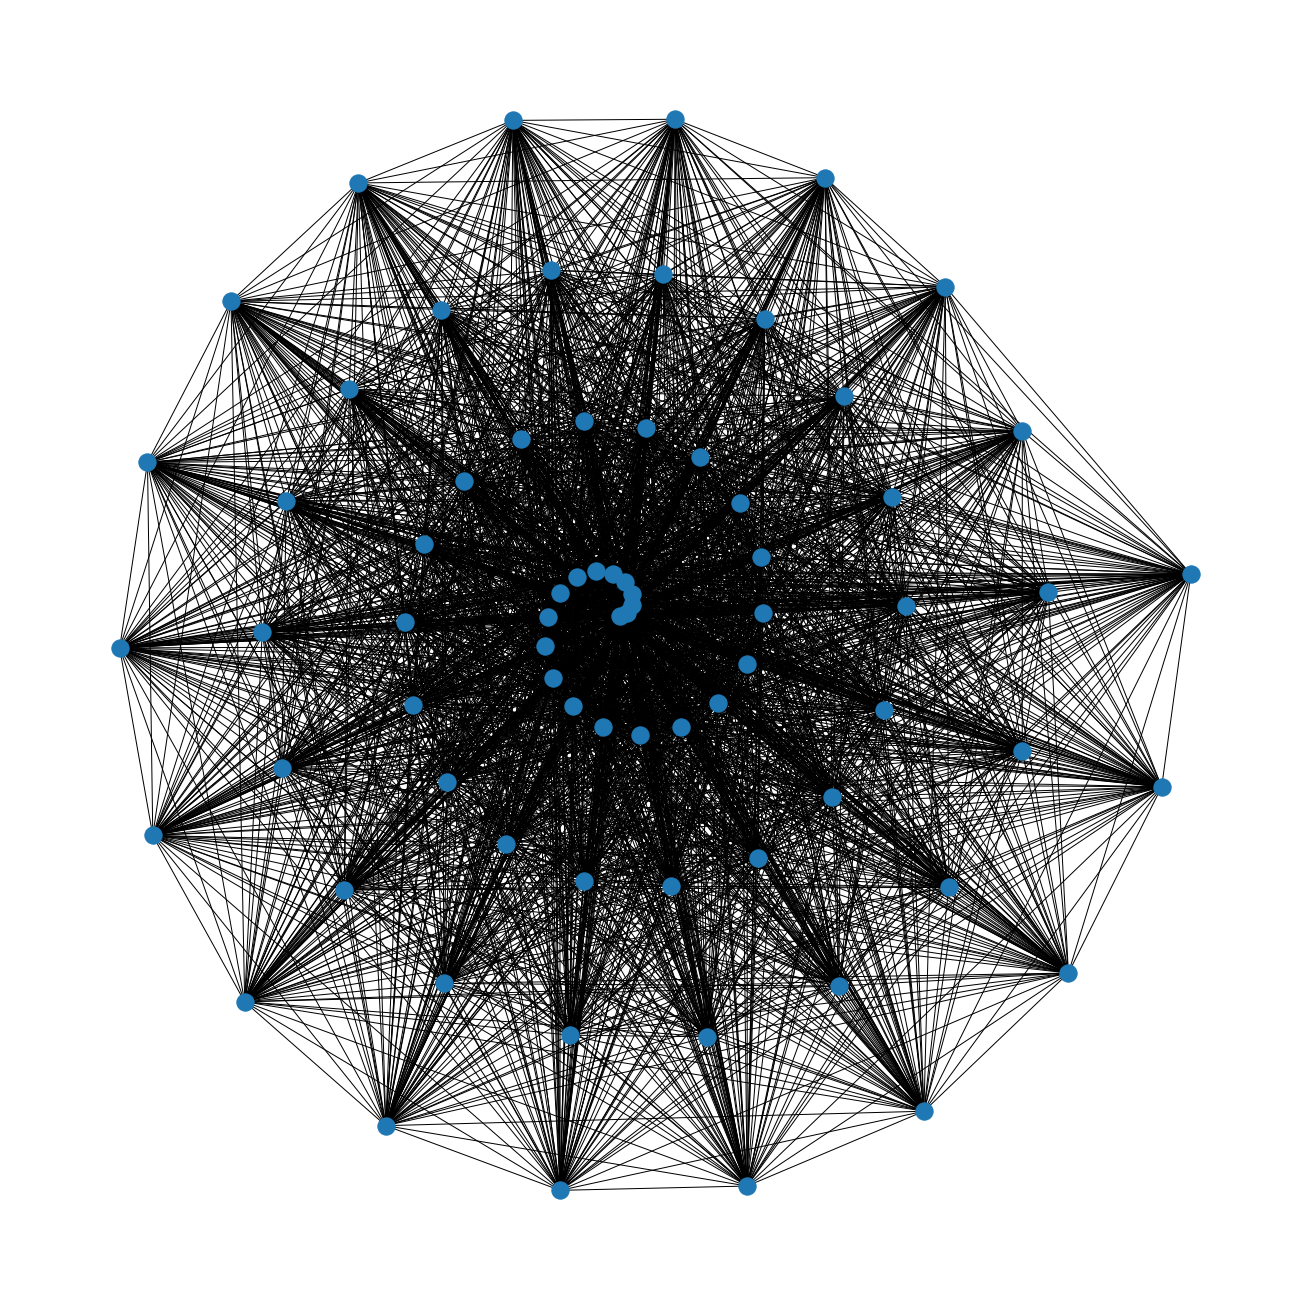

In [91]:
matrix = np.array(matrix)
Graph = nx.from_numpy_matrix(matrix,create_using=nx.MultiGraph())
plt.figure(figsize=(18,18))
pos = nx.spiral_layout(Graph)
nx.draw(Graph,pos)
plt.show()

In [84]:
pg = sorted(nx.pagerank(Graph).items(),key= lambda x : x[1],reverse=True)
sent = [i[0] for i in pg[:15]]

In [85]:
for i in sent:
    print(sentences[i])

From there on it’s an orgy.”
That would be boring.
Major spoilers for Saltburn follow.
They’re the rich seigneurs of the island.
They love being surrounded by pretty women.
The juxtaposition between the angel (or is it Icarus?)
But what if the symbolism of the Minotaur is actually inverted?
They in turn sacrifice themselves for him — Oliver does not.
Saltburn is by no means perfect but it captures one’s interest.
The figure of the Minotaur cannot be neatly categorized.
He is therefore not bound by the norms of the audience.
Like the Minotaur, Oliver has an animal element that rules over him.
Oliver is undoubtedly likened to the Minotaur who had an insatiable hunger for human flesh.
Picasso’s interpretation of the Minotaur also lends support to this analysis.
His actions in the wake of Felix’s death prove this desired endpoint.


## END